In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Simulate an event of rolling a dice

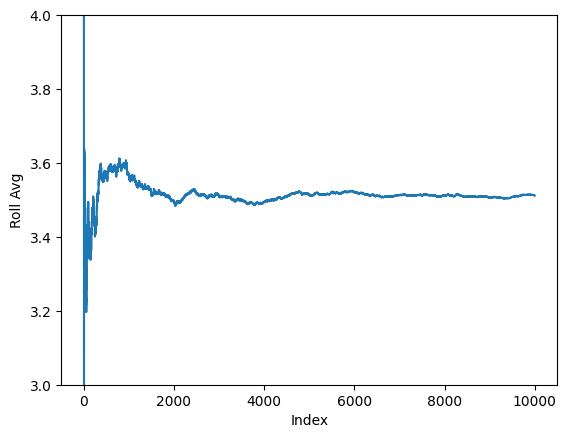

In [31]:
# function to simulate an event of rolling a dice
# possible results = 1, 2, 3, 4, 5, 6
def sim_rolling_dice(count=1):
    index_list, result_list = [], []
    for i in range(1, count+1):
        index_list.append(i)
        result_list.append(random.randint(1, 6))
    return {"Index":index_list, "Roll Value":result_list}

# convert the dictionary to a dataframe
df = pd.DataFrame(sim_rolling_dice(10000))

# creating a new column to keep the average of current counting roll value 
df['Roll Avg'] = df['Roll Value'].expanding().mean()

# plotting a histogram for index vs roll avg
sns.lineplot(df, x=df['Index'], y=df['Roll Avg'])
plt.ylim(3, 4)
plt.show()

In [32]:
# checking final value of the rolling average
df.tail(1)

,Index,Roll Value,Roll Avg
9999,10000,2,3.5119


In [33]:
# save dataframe to csv for future use
df.to_csv('SimulationResults.csv', index=False)

In [35]:
df.tail(5)

,Index,Roll Value,Roll Avg
9995,9996,4,3.512405
9996,9997,3,3.512354
9997,9998,1,3.512102
9998,9999,3,3.512051
9999,10000,2,3.511900


## Gambler's Ruin Simulation

<AxesSubplot:xlabel='Index', ylabel='Balance'>

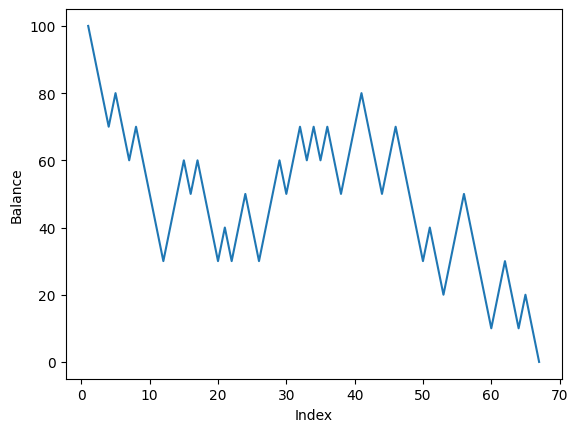

In [37]:
def gambling_simulation(balance=10000, bet=100, winning_chance=0.4865, payout=1):
    
    i = 1
    index_list = [i]
    balance_list = [balance]
    while balance >= bet or i == 100:
        i = i + 1
        index_list.append(i)
        if random.random() < winning_chance:
            balance = balance - bet
        else:
            balance = balance + float("{:.2f}".format(payout*bet))
        balance_list.append(balance)
        
    return {'Index':index_list, 'Balance':balance_list}

# simulating an event where balance=100, bet range=10, and win chance=0.4865 aka European Roulette
x = gambling_simulation(100, 10, 0.4865)

# saving to dataframe
df2 = pd.DataFrame(x)

# plotting a graph of overtime balance after multiple rounds
sns.lineplot(df, x=df2['Index'], y=df2['Balance'])

In [38]:
df2.to_csv('GamblersRuinSim.csv', index=False)

In [39]:
df2.tail(5)

,Index,Balance
62,63,20.0
63,64,10.0
64,65,20.0
65,66,10.0
66,67,0.0
